# Give Me Some Credit - Exploratory Analysis and Simple Modeling
I will be looking at the Give Me Some Credit dataset on Kaggle as part of the Paidy Dataset exercise. Remember that we want a probability at the end. (this points to a good logistic regression problem)

**Problem:** Detecting Fraud is hard. We want to be informed on how to detect fraud, better understand those who commit fraud, and figure out how to detect it with accuracy.

While this is a giant problem, I'm going to dive into one small subset of this issue with this dataset: Looking at Monthly Income.

**Background:** From looking at the features in this dataset, the feature that sticks out to me as being both interesting to look at and also one that I would be more knowledgable of is Monthly Income. I could see it being useful for predicting fraud (people who make more will pay back their loans), but could also see it not being an important indicator (people spend more money as they make money - to a certain extent income doesn't matter). It seems interesting enough that I want to see if it matters in predicting whether someone will pay back a loan or not. 

**Hypothesis: Monthly Income matters in predicting whether someone will pay back their loan or not. Namely, the higher the income, the less likely for delinquency**

To view notebook: https://nbviewer.jupyter.org/github/thealongsider/Data-Analytics-Projects/blob/master/Paidy/Paidy%20Dataset%20Exercise.ipynb

The following button toggles the code on and off:

In [128]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Initial look at the Data

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [126]:
cred = pd.read_csv('cs-training.csv',index_col = 0)

First 5 Rows in the Dataset:

In [127]:
cred.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Basic Descriptive Statistics of each column:

In [5]:
cred.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Data types and number of rows for each column:

In [6]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


We are given the following descriptions for each feature:
- SeriousDlqin2yrs : Person experienced 90 days past due delinquency or worse
- RevolvingUtilizationOfUnsecuredLines : Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits as a percentage
- age : Age of borrower in years
- NumberOfTime30-59DaysPastDueNotWorse : Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- DebtRatio : Monthly debt payments, alimony,living costs divided by monthy gross income as a percentage
- MonthlyIncome	: Monthly income
- NumberOfOpenCreditLinesAndLoans : Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- NumberOfTimes90DaysLate : Number of times borrower has been 90 days or more past due.
- NumberRealEstateLoansOrLines : Number of mortgage and real estate loans including home equity lines of credit
- NumberOfTime60-89DaysPastDueNotWorse : Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- NumberOfDependents : Number of dependents in family excluding themselves (spouse, children etc.)

Summary Information from Pandas Profiling library:

In [7]:
import pandas_profiling

In [8]:
#pandas_profiling.ProfileReport(cred)
#running normally gives us information on the correlation of variables, but the report tries to remove them automatically.
#while this information is very useful to know, I'd like to keep it in there for now. 
#Information gained: Numberoftime 30-59 days past due not worse is 0.98+ correlated with 60-89 and over 90 days late
#We'll want to confirm this and understand what this means in our case.


l = list(cred.columns)
pandas_profiling.ProfileReport(cred, correlation_overrides=l)

Number of variables,12
Number of observations,150000
Total Missing (%),1.9%
Total size in memory,13.7 MiB
Average record size in memory,96.0 B
Numeric,11
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## First Impressions:

Looks like we'll need to deal with missing values in monthly income and number of dependents. Also will want to look at the min/max values to see if they are real or outliers. Will probably want to log transform monthly income at least. Revolving and debt ratio also have crazy high maxes compared to their mean/medians so we'll want to see what is happening there as well. It seems to me that number of 90 days past due and the target variable are the same - want to look at this to see if it's needed.

# Data Cleaning


## Checking for Outliers

We quickly notice that there are very large max values compared to the mean/medians in RevolvingUtilizationofUnsecuredLines (afterwards referred to as RUUL) and the debt ratio. We want to examine these values and determine if we should keep them in the analysis or not. 

In [9]:
#start with RUUL
cred[cred['RevolvingUtilizationOfUnsecuredLines']>10000]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
13670,0,10209.0,65,0,0.268667,12133.0,6,0,3,0,0.0
16957,0,22198.0,38,0,2312.000000,NaN,5,0,2,0,0.0
21979,0,17441.0,51,1,0.354072,14770.0,14,0,2,0,0.0
31415,0,29110.0,58,0,0.402560,10000.0,7,0,1,0,0.0
58853,0,11843.0,45,1,0.331641,10833.0,5,0,2,0,2.0
71706,0,13400.0,43,0,0.995801,5000.0,11,0,1,0,1.0
72593,0,13498.0,38,0,0.347428,4800.0,6,0,1,0,2.0
76727,0,10821.0,51,0,2028.000000,NaN,7,0,1,0,NaN
83053,0,11553.0,66,1,3742.000000,NaN,6,0,1,0,2.0
85490,0,50708.0,55,0,0.221757,38000.0,7,0,2,0,0.0


(array([1.49901e+05, 5.20000e+01, 1.90000e+01, 1.20000e+01, 6.00000e+00,
        3.00000e+00, 1.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0. ,  2535.4,  5070.8,  7606.2, 10141.6, 12677. , 15212.4,
        17747.8, 20283.2, 22818.6, 25354. , 27889.4, 30424.8, 32960.2,
        35495.6, 38031. , 40566.4, 43101.8, 45637.2, 48172.6, 50708. ]),
 <a list of 20 Patch objects>)

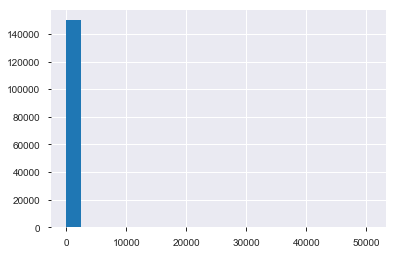

In [137]:
plt.hist(cred['RevolvingUtilizationOfUnsecuredLines'],bins=20)

While I don't know much about RUUL and how you could have such a high %, it seems like these numbers could be correct? I'm not sure. Would need to investigate further. Doing a quick search, having a less than 30% revolving utilization rate is better to have a good credit score, but obviously didn't affect whether they didn't pay their loan, so, it seems like this is data that we'll keep, but we'll certaintly need to standardize it for any model creation.

Idk. Seems like there's huge issues here. how can you have a higher balance than the sum of your credit limits?? I'm pretty sure the upper limit is 1.0 here...

In [10]:
#DebtRatio (though I assume it's similar to RUUL)
cred[cred['DebtRatio']>50000]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
4855,0,0.000000,56,0,168835.0,NaN,10,0,3,0,2.0
7514,0,0.152293,71,0,110952.0,NaN,9,0,0,0,0.0
36601,0,0.001782,65,0,326442.0,NaN,6,0,1,0,0.0
46103,0,0.003928,76,0,52112.0,NaN,27,0,23,0,0.0
53683,0,1.000000,89,0,61106.5,1.0,2,0,0,0,0.0
58901,0,0.182640,37,0,220516.0,NaN,8,0,3,0,NaN
60153,0,0.000000,65,0,329664.0,NaN,9,0,3,0,0.0
66786,0,1.000000,63,0,61907.0,NaN,13,0,6,0,0.0
69846,0,0.386451,66,0,101320.0,NaN,12,0,0,0,0.0
103042,0,0.364845,65,0,106885.0,NaN,8,0,4,0,NaN


It seems that, while not good, you can probably have an insanely high debt ratio... But for them to not be in serious delquincy is pretty counter-intuitive and probably incorrect. More reason to potentially drop the data.

(array([6.0000e+00, 1.6900e+02, 5.3800e+02, 1.5480e+03, 3.5840e+03,
        4.6170e+03, 8.3390e+03, 3.6813e+04, 5.3651e+04, 1.0271e+04,
        1.4650e+03, 1.8620e+03, 2.6340e+03, 2.2860e+03, 5.1980e+03,
        1.2268e+04, 4.5760e+03, 1.5200e+02, 1.6000e+01, 7.0000e+00]),
 array([-10.55741402,  -9.39425186,  -8.23108969,  -7.06792753,
         -5.90476537,  -4.74160321,  -3.57844104,  -2.41527888,
         -1.25211672,  -0.08895456,   1.07420761,   2.23736977,
          3.40053193,   4.56369409,   5.72685626,   6.89001842,
          8.05318058,   9.21634274,  10.37950491,  11.54266707,
         12.70582923]),
 <a list of 20 Patch objects>)

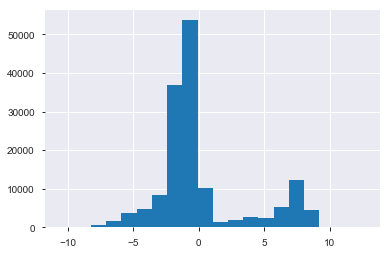

In [131]:
plt.hist(cred['DebtRatio'].replace(0,1).apply(np.log),bins=20)

0 to -10 makes sense, but what is the distribution That's so high??... This actually makes me think that the shifted distribution is probably where the Monthly Income was supposed to be. Somehow in the transfer process, it looks like the data was shifted from monthly income, as this looks MUCH closer to the monthly income distribution than it is to the rest of the distribution. In fact, if you go above to where we were looking at the RUUL, you see that, where the monthly income slots were NaN values (empty), the DebtRatio value looks almost like it belongs in the monthly income column. 

"The 43 percent debt-to-income ratio is important because, in most cases, that is the highest ratio a borrower can have and still get a Qualified Mortgage. There are some exceptions." https://www.consumerfinance.gov/ask-cfpb/what-is-a-debt-to-income-ratio-why-is-the-43-debt-to-income-ratio-important-en-1791/

If we use this as a baseline for understanding, getting over 1 is a big problem, let alone reaching orders of magnitude greater. Therefore, anything over 100 must be ridiculous in my mind (could pick 1000?) either way- we're going to drop those. 

In [11]:
cred[cred['MonthlyIncome']<10]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
15,0,0.019657,76,0,477.0,0.0,6,0,1,0,0.0
45,0,0.368876,68,0,1687.5,1.0,31,0,1,0,0.0
51,0,0.818978,73,0,3095.0,0.0,9,0,1,1,0.0
74,0,0.059669,31,0,3162.0,0.0,11,0,2,0,1.0
91,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
168,0,0.020966,29,0,639.5,1.0,3,0,1,0,2.0
196,1,0.025892,38,0,74.5,1.0,13,0,0,0,2.0
218,0,0.222696,42,0,800.0,1.0,3,0,1,0,2.0
299,0,0.085152,25,0,1005.0,0.0,5,0,0,0,0.0
327,0,0.013115,43,0,4211.0,0.0,21,0,2,0,2.0


<font color=red>Also, how is there people who have $1/month? It makese sense that there is 0 for some people, especially age... Maybe it's the equivalent to 0. Shouldn't be an issue regardless. Interested in what this means - was it inserted as 1? and why not 0 at that point? 

Also, is the default for RUUL 0? Or is it 1? Is the max 1 and everything above that shouldn't actually be in the data?</font>

In [12]:
cred[cred['NumberOfTimes90DaysLate']>90].head(20)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1734,1,1.0,27,98,0.000000,2700.0,0,98,0,98,0.0
2287,0,1.0,22,98,0.000000,NaN,0,98,0,98,0.0
3885,0,1.0,38,98,12.000000,NaN,0,98,0,98,0.0
4418,0,1.0,21,98,0.000000,0.0,0,98,0,98,0.0
4706,0,1.0,21,98,0.000000,2000.0,0,98,0,98,0.0
5074,0,1.0,33,98,0.000000,1500.0,0,98,0,98,0.0
6281,1,1.0,51,98,0.000000,7500.0,0,98,0,98,0.0
7033,1,1.0,29,98,0.000000,1647.0,0,98,0,98,0.0
7118,1,1.0,25,98,21.000000,NaN,0,98,0,98,NaN
7688,1,1.0,21,98,0.000000,NaN,0,98,0,98,0.0


<font color=red>It almost looks like 98 is a place holder.. Or it's the maximum of this dataset?? I'm not sure what's going on here, but it looks like it could be an error of some kind. Especially because all of their RUUL rates are 1.00 with a debt ratio of 0. Seems like a placeholder. Will want to remove them and set aside for investigation.</font>

In [13]:
#want to make sure I filter higher than the true max in the dataset
cred[cred['NumberOfTimes90DaysLate']<90].max()

SeriousDlqin2yrs                              1.0
RevolvingUtilizationOfUnsecuredLines      50708.0
age                                         109.0
NumberOfTime30-59DaysPastDueNotWorse         13.0
DebtRatio                                329664.0
MonthlyIncome                           3008750.0
NumberOfOpenCreditLinesAndLoans              58.0
NumberOfTimes90DaysLate                      17.0
NumberRealEstateLoansOrLines                 54.0
NumberOfTime60-89DaysPastDueNotWorse         11.0
NumberOfDependents                           20.0
dtype: float64

In [14]:
#set the dataset aside to report to/work with database admin
cred_98anomolyset=cred[cred['NumberOfTimes90DaysLate']>90]
#cred_98anomolyset.to_csv(r'Path',header=True)

In [15]:
cred_e= cred[cred['NumberOfTimes90DaysLate']<90]

In [16]:
cred_e.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [17]:
cred_e[cred_e['MonthlyIncome'].isnull()]['SeriousDlqin2yrs'].value_counts()

0    28004
1     1606
Name: SeriousDlqin2yrs, dtype: int64

This is a similar proportion (\~6%) of defaulters to not that is in the whole dataset (\~7%), so I feel more confident in being able to drop these values and not lose too much or too little of our target variable in the process.

In [18]:
#want to confirm that the first column adn the greater than 90 days column is pretty much the same. 

In [19]:
cred_e[(cred_e['NumberOfTimes90DaysLate']>0) & (cred_e['SeriousDlqin2yrs']==0)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
50,0,0.000080,70,0,0.256340,6900.0,21,1,1,0,0.0
69,0,0.004264,31,0,0.111444,2000.0,6,1,0,0,2.0
73,0,0.827708,56,0,0.369591,6793.0,15,1,1,0,0.0
96,0,0.245353,37,0,0.288417,6500.0,11,1,1,1,0.0
177,0,1.000000,69,0,0.005319,2255.0,0,1,0,0,3.0
183,0,0.676195,55,0,0.436666,3970.0,10,1,1,0,0.0
192,0,1.095083,53,5,0.536704,3500.0,7,1,1,2,0.0
212,0,1.000000,66,1,0.358101,1937.0,4,1,0,0,0.0
287,0,1.000000,47,0,0.092163,9493.0,2,2,0,1,0.0


<font color=red>Also seems like a lot of the answers for RUUL is 1.00000. is this a default as well??</font>

<font color=red>*** ***LOOK ONLINE AND ADDRESS THIS ISSUE - IS THIS A MISTAKE? ARE WE MISUNDERSTANDING THE FEATURES? WHAT DOES IT MEAN TO HAVE >1 IN THE 90 DAYS BUT 0 IN THE 60 DAYS? IS IT ONLY COUNTED ONCE? ***</font>

probably need to remove the above too? not sure... I think I'm going to choose to drop it simply because I don't know much about the data. To be on the safe side, I'm going to drop it for the model, opting for higher quality data over quantity, especially when we're creating the model. If the real world looks like this, then we'll deal with it the best we can, but our model needs to be trained on the best data so that when these outliers show up they are more obvious and, hopefully, detectable to a certain extent if they have erroneous data, but, if they have missing data, we can be more confident on using our model on only a few of our features.

## Handling Missing Data

After careful consideration, I've decided to fill in the number of dependent NaNs with the median (which happens to be 1) and dropping all records with a NaN for monthly income. I will also create another dataframe with Monthly Income filled in with the median as well to see if that enhances our model down the road, but, without knowing much about how this variable will affect the investigation (and assuming there is a high impact of monthly income on whether someone pays back their loan or not), it seemed better to drop it entirely so we can compare all of the information equally without assumption, especially visually. 

While it's not ideal to drop 20% of the dataset, it's better than making assumptions about the relative impact of monthly income data before we do our analysis. If we want to add it in later, we can, but that will depend on our findings. Regardless, I would want to ask/figure out why there are so many empty missing data points for monthly income while the majority of the other features don't have missing data. This alone is worth investigating, especially if our assumption that it's an important indicator of paying off the loan actually holds.

In [20]:
cred_e['NumberOfDependents']=cred_e['NumberOfDependents'].fillna(cred_e['NumberOfDependents'].median())

C:\Users\Brandon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
#checking through the warning.
cred_e[cred_e['NumberOfDependents'].isnull()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [22]:
cred_incdrop=cred_e.dropna()

In [23]:
cred_incdrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120121 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        120121 non-null int64
RevolvingUtilizationOfUnsecuredLines    120121 non-null float64
age                                     120121 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    120121 non-null int64
DebtRatio                               120121 non-null float64
MonthlyIncome                           120121 non-null float64
NumberOfOpenCreditLinesAndLoans         120121 non-null int64
NumberOfTimes90DaysLate                 120121 non-null int64
NumberRealEstateLoansOrLines            120121 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    120121 non-null int64
NumberOfDependents                      120121 non-null float64
dtypes: float64(4), int64(7)
memory usage: 11.0 MB


In [24]:
cred_incdrop.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0


In [25]:
cred_incfilled=cred_e
cred_incfilled['MonthlyIncome']=cred_incfilled['MonthlyIncome'].fillna(cred_incfilled['MonthlyIncome'].median())

C:\Users\Brandon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
cred_incfilled.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,5400.0,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,5400.0,2,0,0,0,0.0
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


## (Section to be removed)

May not want to fill the data before the machine learning model.

In [27]:
# I want to bin the monthly income data into % and then have count bins for each percentage.
# need to create a new dataframe that bins I think and then do the count. 
#the idea is that if we do this, we can see the distribution of deliquenting. 
cred_dropped = cred.dropna()

In [ ]:
bins = [0,10,20,30,40,50,60,70,80,90,100]

In [ ]:
cred['MonthlyInclog']=cred['MonthlyIncome'].apply(np.log)

In [ ]:
cred['binned']=pd.cut(cred['MonthlyInclog'],bins)

In [ ]:
cred_incdrop.columns

In [ ]:
ccol = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

# Exploratory Data Analysis

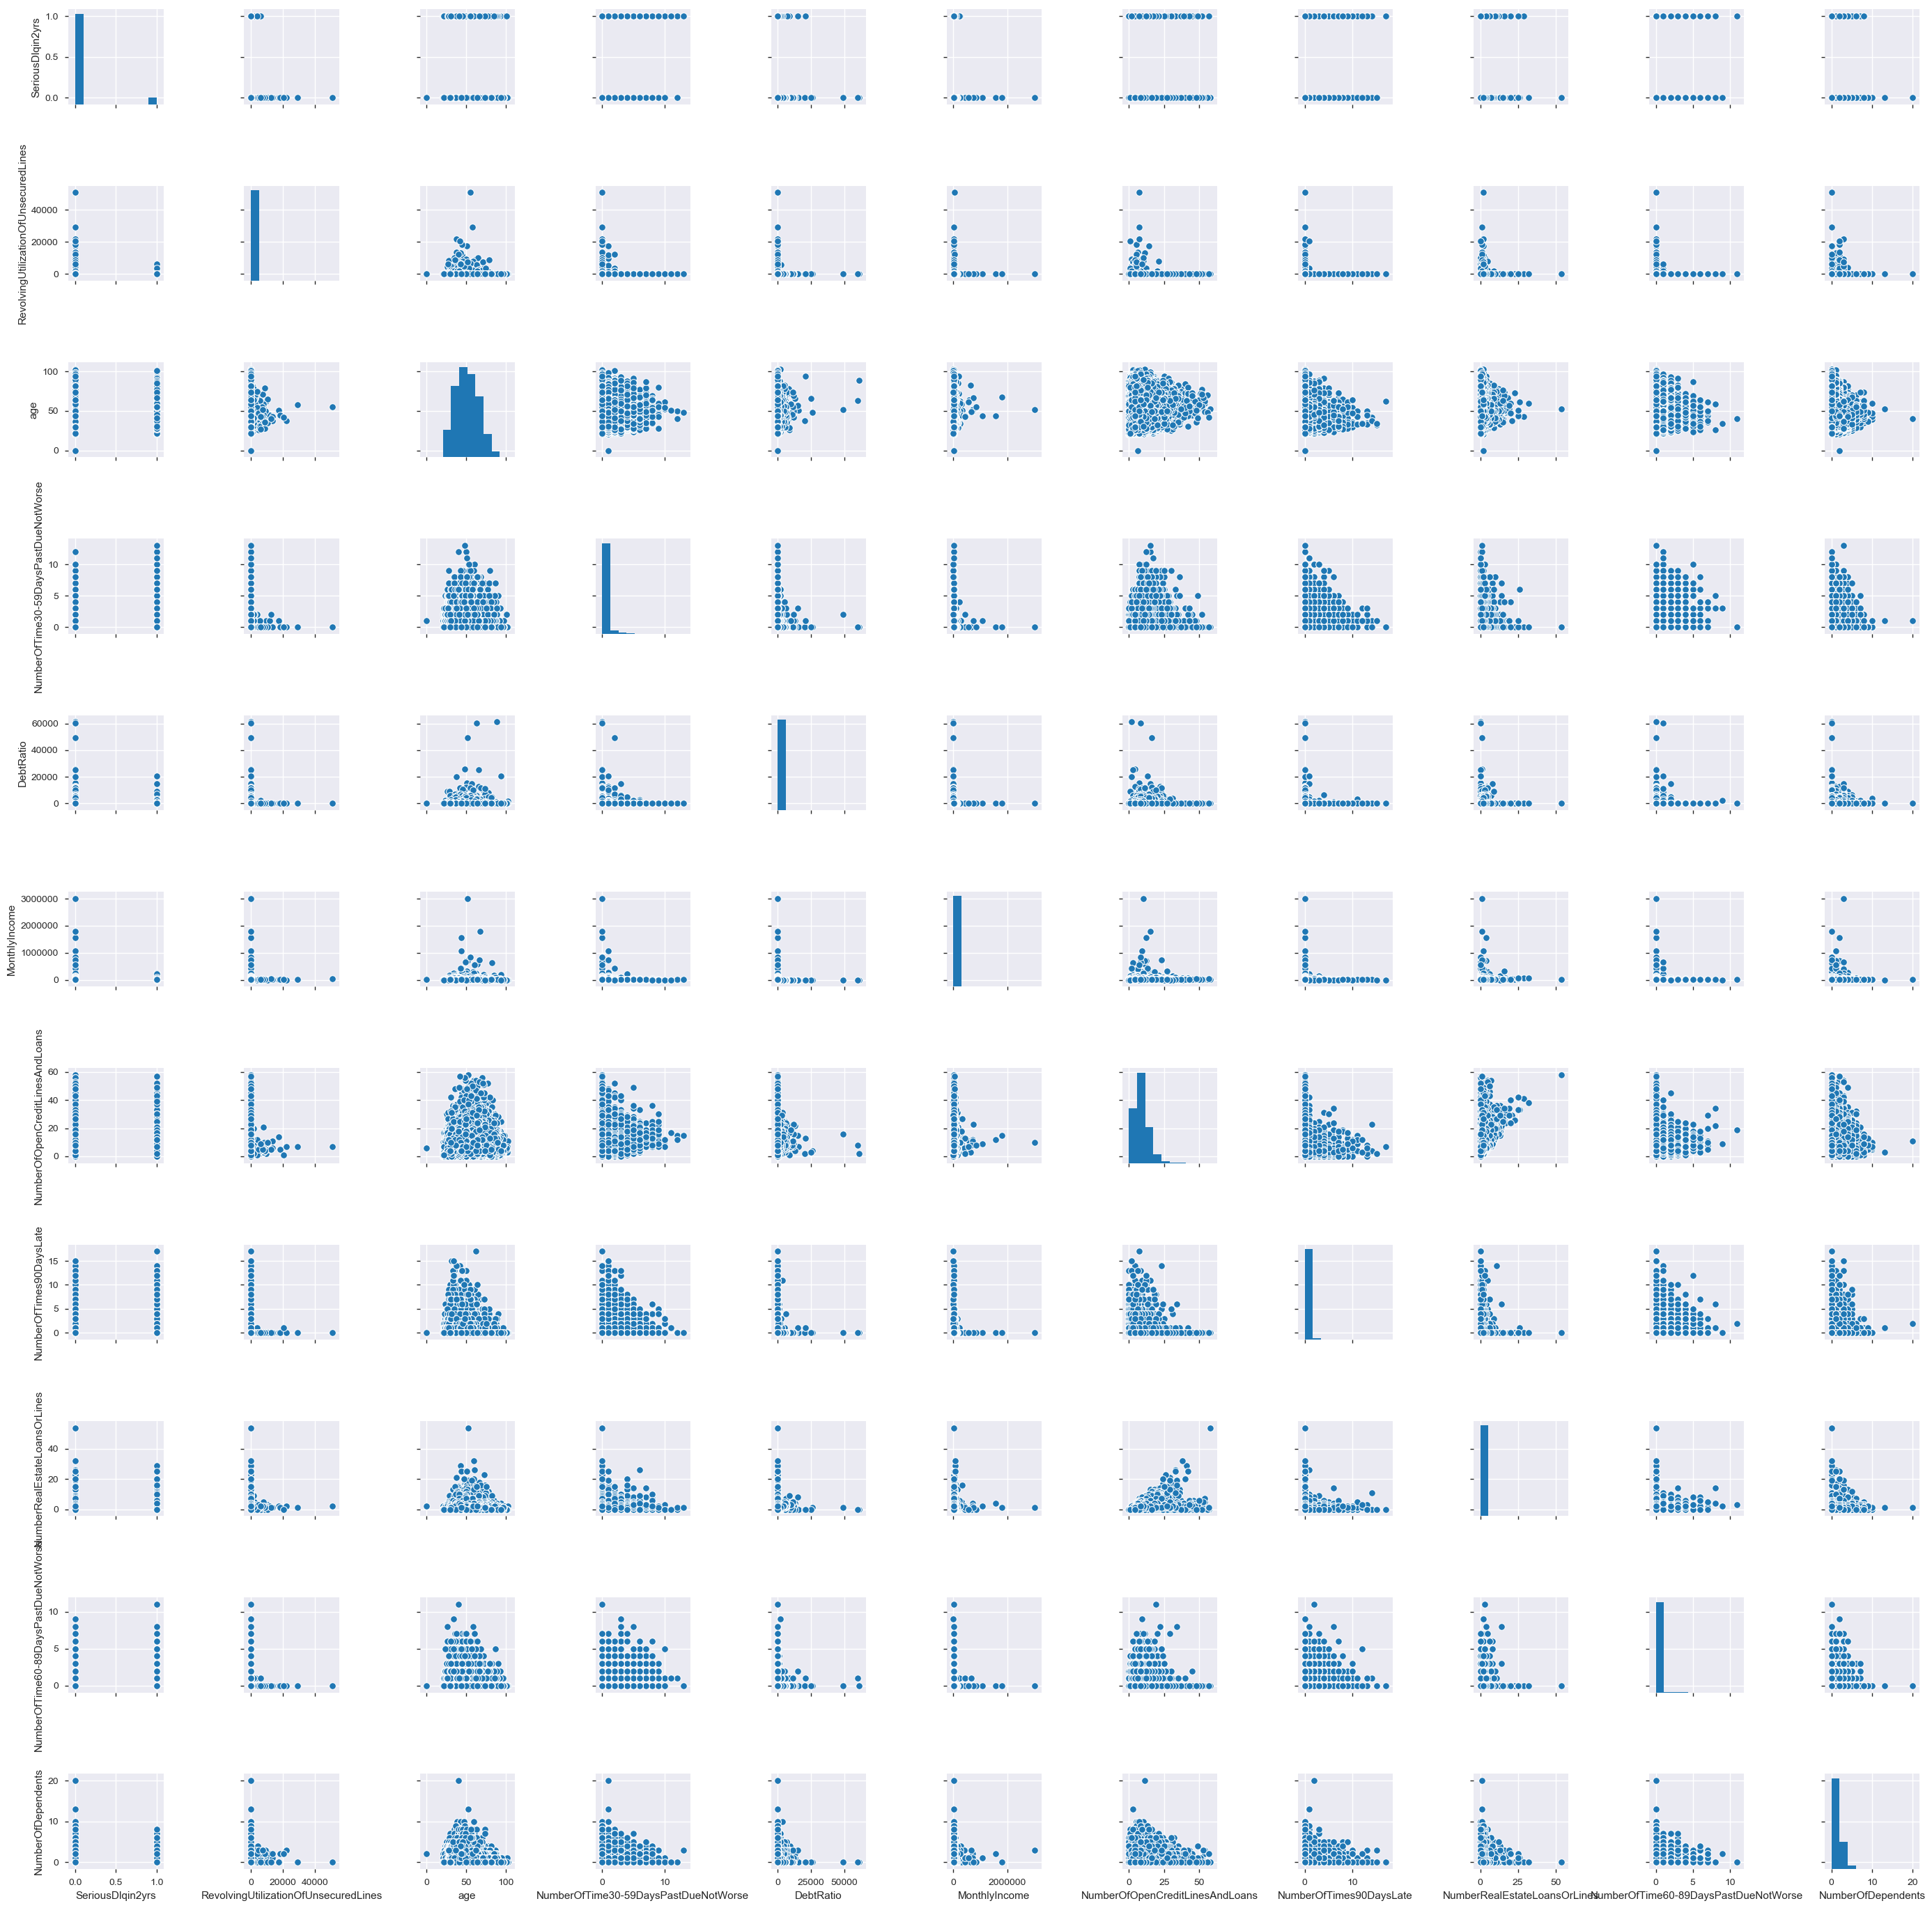

In [28]:
sns.pairplot(cred_incdrop)

At a glance, it looks like RUUL, monthly income, and potentially debt ratio could be the bigger indicators of delinquency. We'll investigate these further. These hunches will be confirmed based on the logistic model we make later as well. I think looking at these in terms of monthly income could help shed some light. 

Text(0.5,1,'Count of Outstate Tuition')

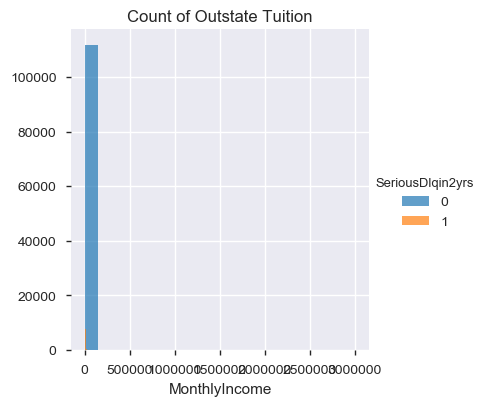

In [29]:
g = sns.FacetGrid(cred_incdrop,hue='SeriousDlqin2yrs',height=4)
g = (g.map(plt.hist,'MonthlyIncome', alpha=0.7, bins=20)).add_legend()
axes = g.axes.flatten()
axes[0].set_title('Count of Outstate Tuition')

It seems clear that we'll need to log transform the monthly income in order to be able to visualize the data and get anythign from it. 

In [30]:
#need to convert monthly income of 0 to 1 for the log transformation. Scale-wise, I think this is an appropriate call.
cred_incdrop['MonthlyIncome']=cred_incdrop['MonthlyIncome'].replace(0,1)

C:\Users\Brandon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
cred_incdrop['MonthlyIncomelog']=cred_incdrop['MonthlyIncome'].apply(np.log)

C:\Users\Brandon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
cred_incdrop[cred_incdrop['MonthlyIncome']<10]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncomelog
15,0,0.019657,76,0,477.0,1.0,6,0,1,0,0.0,0.000000
45,0,0.368876,68,0,1687.5,1.0,31,0,1,0,0.0,0.000000
51,0,0.818978,73,0,3095.0,1.0,9,0,1,1,0.0,0.000000
74,0,0.059669,31,0,3162.0,1.0,11,0,2,0,1.0,0.000000
91,0,0.039388,51,0,15466.0,1.0,7,0,0,0,0.0,0.000000
168,0,0.020966,29,0,639.5,1.0,3,0,1,0,2.0,0.000000
196,1,0.025892,38,0,74.5,1.0,13,0,0,0,2.0,0.000000
218,0,0.222696,42,0,800.0,1.0,3,0,1,0,2.0,0.000000
299,0,0.085152,25,0,1005.0,1.0,5,0,0,0,0.0,0.000000
327,0,0.013115,43,0,4211.0,1.0,21,0,2,0,2.0,0.000000


Text(0.5,1,'Monthly Income Log Distribution')

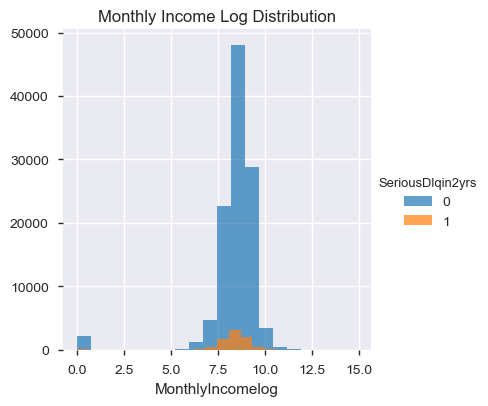

In [104]:
g = sns.FacetGrid(cred_incdrop,hue='SeriousDlqin2yrs',height=4)
g = (g.map(plt.hist,'MonthlyIncomelog', alpha=0.7, bins=20)).add_legend()
axes = g.axes.flatten()
axes[0].set_title('Monthly Income Log Distribution')

Because these distributions overlap, we can't say that they are significantly different visually. This leads me to think that monthly income doesn't matter towards whether people pay back their loan or not. 

Text(0.5,1,'Serious Delinquency in 2 years Distribution')

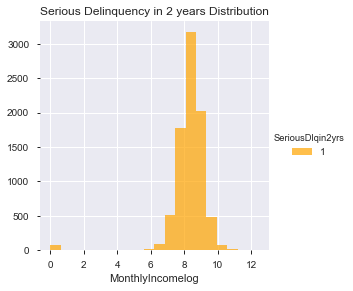

In [138]:
g = sns.FacetGrid(cred_incdrop[cred_incdrop['SeriousDlqin2yrs']==1],hue='SeriousDlqin2yrs',height=4)
g = (g.map(plt.hist,'MonthlyIncomelog', alpha=0.7, bins=20,color='orange')).add_legend()
axes = g.axes.flatten()
axes[0].set_title('Serious Delinquency in 2 years Distribution')

Looks like a normal distribution. What does this mean? I think this means that this was an appropriate transformation to make. 

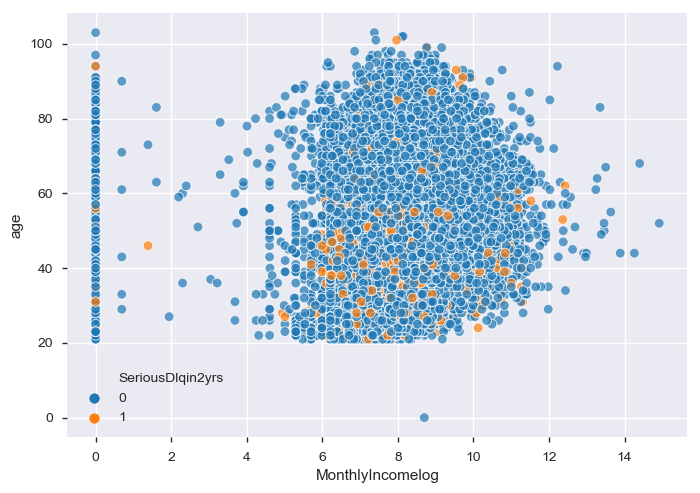

In [37]:
sns.scatterplot(data=cred_incdrop,x='MonthlyIncomelog',y='age', hue='SeriousDlqin2yrs',alpha = 0.7)

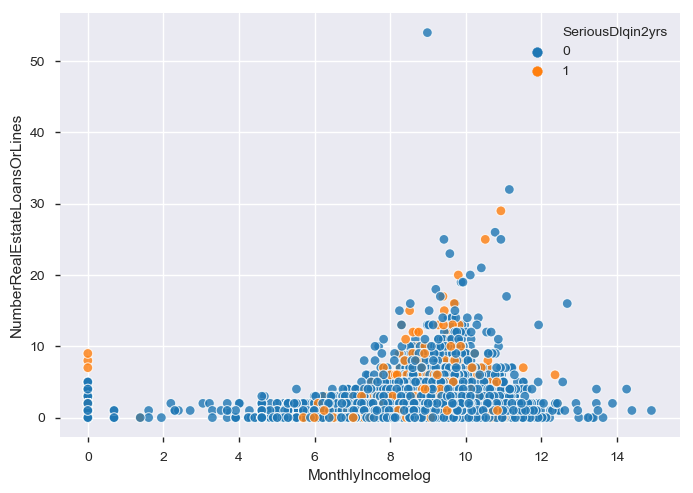

In [38]:
sns.scatterplot(data=cred_incdrop,x='MonthlyIncomelog',y='NumberRealEstateLoansOrLines', hue='SeriousDlqin2yrs',alpha=0.8)

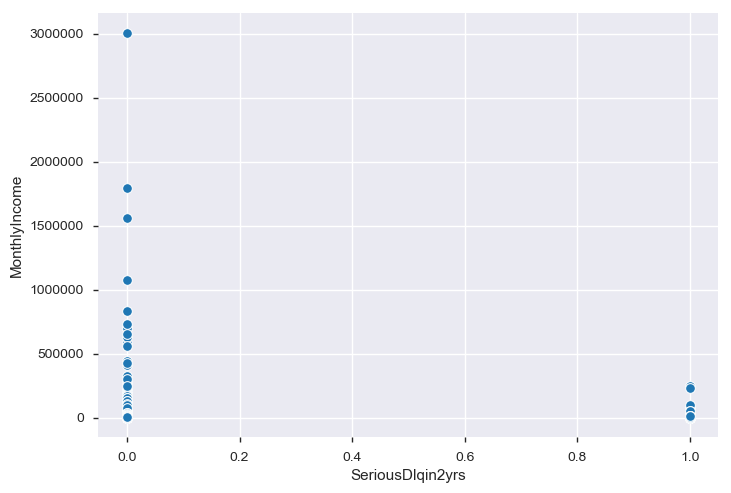

In [47]:
sns.scatterplot(data=cred_incdrop,x='SeriousDlqin2yrs',y='MonthlyIncome')

In [48]:
cred_incdrop[(cred_incdrop['MonthlyIncome']>10000) & (cred_incdrop['SeriousDlqin2yrs']==1)].max()

SeriousDlqin2yrs                             1.000000
RevolvingUtilizationOfUnsecuredLines         3.278989
age                                         93.000000
NumberOfTime30-59DaysPastDueNotWorse        13.000000
DebtRatio                                   35.440782
MonthlyIncome                           250000.000000
NumberOfOpenCreditLinesAndLoans             57.000000
NumberOfTimes90DaysLate                     12.000000
NumberRealEstateLoansOrLines                29.000000
NumberOfTime60-89DaysPastDueNotWorse        11.000000
NumberOfDependents                           6.000000
MonthlyIncomelog                            12.429216
dtype: float64

In [49]:
cred_incdrop[(cred_incdrop['MonthlyIncome']>250000)].count()

SeriousDlqin2yrs                        20
RevolvingUtilizationOfUnsecuredLines    20
age                                     20
NumberOfTime30-59DaysPastDueNotWorse    20
DebtRatio                               20
MonthlyIncome                           20
NumberOfOpenCreditLinesAndLoans         20
NumberOfTimes90DaysLate                 20
NumberRealEstateLoansOrLines            20
NumberOfTime60-89DaysPastDueNotWorse    20
NumberOfDependents                      20
MonthlyIncomelog                        20
dtype: int64

Looks like there weren't any delinquencies for incomes larger than 250,000/month, which is only about 20 of the records

I think we're going to run into more scaling issues for debt ratio and RUUL so I'm going to move to creating a quick model to be able to gain more insight.

CONSIDER A BOX PLOT AND THEN CONSIDER REDUCING THE OUTLIER IMPACT BY USING 75% OR SOMETHING SIMILAR TO VISUALIZE THE DATA

In [51]:
cred_incdrop.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncomelog
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,9.118225
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,7.863267
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,8.020270
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,8.101678
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,11.060180


In [102]:
cred_incdrop.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncomelog
count,120121.000000,120121.000000,120121.000000,120121.000000,120121.000000,1.201210e+05,120121.000000,120121.000000,120121.000000,120121.000000,120121.000000,120121.000000
mean,0.068872,5.905910,51.308805,0.261561,26.631541,6.675302e+03,8.769249,0.091508,1.055819,0.067382,0.852182,8.408807
std,0.253238,257.198929,14.417793,0.719067,424.706830,1.439248e+04,5.166898,0.489229,1.149385,0.336564,1.148539,1.352577
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034980,41.000000,0.000000,0.144104,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,8.131531
50%,0.000000,0.176697,51.000000,0.000000,0.296348,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,8.594154
75%,0.000000,0.577142,61.000000,0.000000,0.482856,8.250000e+03,11.000000,0.000000,2.000000,0.000000,2.000000,9.017968
max,1.000000,50708.000000,103.000000,13.000000,61106.500000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000,14.917035


<font color=red>How is number of Times 90 days late have a max of 17? shouldn't there only be a max of 8/9 tops depending how they count it?</font>

In [94]:
pandas_profiling.ProfileReport(cred_incdrop, correlation_overrides=l)

Number of variables,13
Number of observations,120121
Total Missing (%),0.0%
Total size in memory,11.9 MiB
Average record size in memory,104.0 B
Numeric,12
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


Seems like need to make log of Debt Ratio and RUUL as well. 

# Model Preperation
Scaling & training. Logistic (and linear) regression shouldn't have any issues with scaling. 

In [69]:
unscaled_cred = cred_incdrop

# Model Training and Evaluation
logistic model

In [76]:
X1 = unscaled_cred.drop(['SeriousDlqin2yrs','MonthlyIncome'],axis=1)
X1.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncomelog
1,0.766127,45,2,0.802982,13,0,6,0,2.0,9.118225
2,0.957151,40,0,0.121876,4,0,0,0,1.0,7.863267
3,0.658180,38,1,0.085113,2,1,0,0,0.0,8.020270
4,0.233810,30,0,0.036050,5,0,0,0,0.0,8.101678
5,0.907239,49,1,0.024926,7,0,1,0,0.0,11.060180


In [53]:
y1 = unscaled_cred['SeriousDlqin2yrs']

In [55]:
from sklearn.model_selection import train_test_split

In [77]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=101)

In [57]:
from sklearn.linear_model import LogisticRegression

In [78]:
logmodel1 = LogisticRegression()

In [79]:
logmodel1.fit(X1_train,y1_train)

C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [80]:
predict1=logmodel1.predict(X1_test)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y1_test,predict1))
print(classification_report(y1_test,predict1))

[[33264   231]
 [ 2188   354]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     33495
           1       0.61      0.14      0.23      2542

   micro avg       0.93      0.93      0.93     36037
   macro avg       0.77      0.57      0.60     36037
weighted avg       0.91      0.93      0.91     36037



In [85]:
#Creating functions for ROCAUC curves, precision-recall curve, and Coefficient report
def ROCAUC(xtest,ytest,modelname):
    """Draws the ROC curve and calculates AUC"""
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    probs = modelname.predict_proba(xtest)
    #want only the probabilities for the positive outcome only
    probs=probs[:,1] 
    auc = roc_auc_score(ytest, probs)
    print('AUC: %.3f' %auc)
    #roc curve
    fpr,tpr,thresholds = roc_curve(ytest, probs)
    #plot the no skill 50/50 guess
    _ = plt.plot([0,1],[0,1],linestyle='--')
    #plot the roc curver for the model
    _ = plt.plot(fpr,tpr,marker = '.')
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('Receiver operating characteristic')
    plt.show()

def Prerec(xtest,ytest,modelname, predictions):
    """Draws the Precision-recall curve and prints f1,auc, and ap"""
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from sklearn.metrics import auc
    from sklearn.metrics import average_precision_score
    probs = modelname.predict_proba(xtest)
    #want only the probabilities for the positive outcome only
    probs=probs[:,1] 
    precision, recall, threshlds = precision_recall_curve(ytest, probs)
    f1 = f1_score(ytest,predictions)
    auc = auc(recall, precision)
    #ap stands for average precision score
    ap = average_precision_score(ytest, probs)
    print('f1=%.3f auc = %.3f ap = %.3f' % (f1,auc,ap))
    _ = plt.plot([0,1],[0.5,0.5],linestyle = '--')
    _ = plt.plot(recall, precision, marker ='.')
    plt.show()
    
def Coefsum(X,y):
    import statsmodels.api as sm
    logit_model=sm.Logit(y,X)
    result = logit_model.fit()
    print(result.summary2())
    
#CAP curve
def CAP(xtest, ytest, modelname):
    """ Calculates the Cumulitive Accuracy Profile (CAP) curve"""
    from sklearn.metrics import auc
    
    total = len(ytest)
    class_1_count = np.sum(ytest)
    class_0_count = total - class_1_count
    plt.figure(figsize = (10,5))
    
    #First plot a random model
    _ = plt.plot([0,total],[0,class_1_count],c='r',linestyle='--',label='Random Model')
    #Plot Perfect model
    _ = plt.plot([0,class_1_count,total],[0,class_1_count,class_1_count],c='grey',linewidth=2,label='Perfect Model')
    #Now to add our model
    probs = modelname.predict_proba(xtest)
    #want only the probabilities for the positive outcome only
    probs=probs[:,1] 
    model_y = [y for _, y in sorted(zip(probs, ytest), reverse = True)]
    y_values = np.append([0], np.cumsum(model_y))
    x_values = np.arange(0, total + 1)
    _ = plt.plot(x_values,y_values,c='b',label='Predictive Model',linewidth=4)
    
    #50% mark line 
    index = int((50*total / 100))
    ## 50% Vertical line from x-axis
    plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')
    
    ## Horizontal line to y-axis from prediction model
    plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')
    
    class_1_observed = y_values[index] * 100 / max(y_values)
    print("Percentage of Total Positive Outcomes at 50%: {}%".format(class_1_observed))
    
    #auc
    # Area under Random Model
    a = auc([0, total], [0, class_1_count])
    
    # Area between Perfect and Random Model
    aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a
    
    # Area between Trained and Random Model
    aR = auc(x_values, y_values) - a

    print("Accuracy Ratio: {}".format(aR / aP*100))
    
    _ = plt.xlabel('Users Tested')
    _ = plt.ylabel('Clicked on Ad')
    _ = plt.title('Cumulative Accuracy Profile')   
    _ = plt.legend()
    
    plt.show()

f1=0.226 auc = 0.350 ap = 0.350


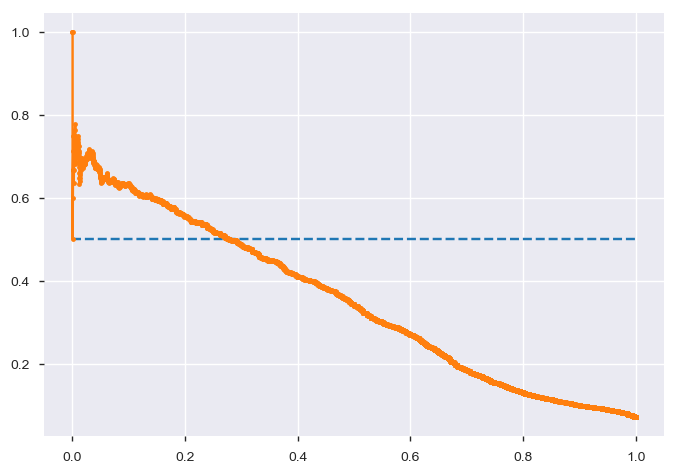

In [83]:
Prerec(X1_test,y1_test,logmodel1,predict1)

AUC: 0.803


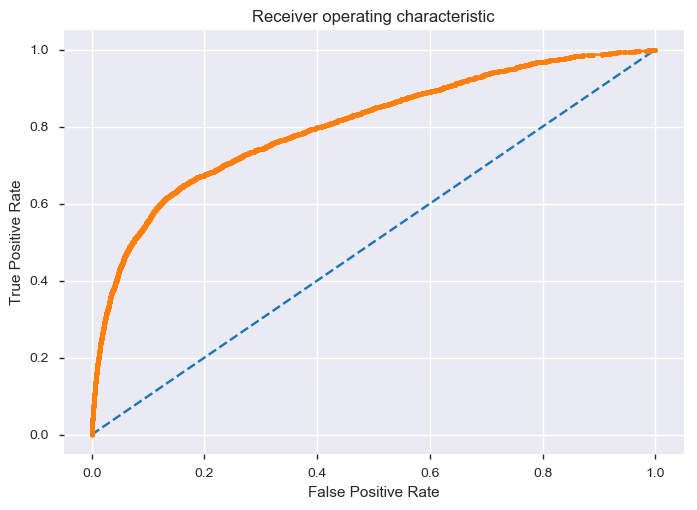

In [84]:
ROCAUC(X1_test,y1_test,logmodel1)

Percentage of Total Positive Outcomes at 50%: 83.32022029897718%
Accuracy Ratio: 60.574852406426785


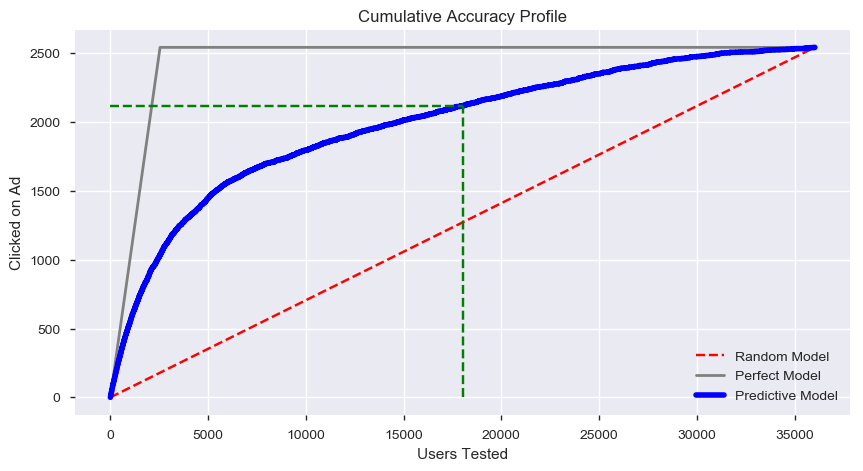

In [86]:
CAP(X1_test,y1_test,logmodel1)

In [87]:
Coefsum(X1,y1)

Optimization terminated successfully.
         Current function value: 0.208033
         Iterations 7
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.170     
Dependent Variable:         SeriousDlqin2yrs       AIC:                    49998.3450
Date:                       2019-08-26 15:26       BIC:                    50095.3076
No. Observations:           120121                 Log-Likelihood:         -24989.   
Df Model:                   9                      LL-Null:                -30116.   
Df Residuals:               120111                 LLR p-value:            0.0000    
Converged:                  1.0000                 Scale:                  1.0000    
No. Iterations:             7.0000                                                   
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.

In [88]:
X1.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'MonthlyIncomelog'],
      dtype='object')

In [101]:
Oddsratio = pd.DataFrame(np.exp(logmodel1.coef_),columns=['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'MonthlyIncomelog'])

In [99]:
Oddsratio.pivot()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncomelog
0,0.99993,0.974469,1.748603,0.999781,0.998377,2.32841,1.091858,2.032884,1.055423,0.950622


Odds Ratio

RUUL: 0.99993
age: 0.974469
# of 30-59 days past due Not Worse

In [132]:
#do it on test data - would like to, really. 
#clean the data/prep how we did. 
test_data = pd.read_csv('cs-test.csv',index_col = 0)
#to take the data out from the 98 anomolies? what if the test data has this in it?(likely does)
#cred_incdrop['MonthlyIncomelog']=cred_incdrop['MonthlyIncome'].apply(np.log)

In [134]:
test_data.head(30)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
6,NaN,0.509791,63,0,0.342429,4140.0,4,0,0,0,1.0
7,NaN,0.587778,50,0,1048.000000,0.0,5,0,0,0,3.0
8,NaN,0.046149,79,1,0.369170,3301.0,8,0,1,0,1.0
9,NaN,0.013527,68,0,2024.000000,NaN,4,0,1,0,0.0
10,NaN,1.000000,23,98,0.000000,0.0,0,98,0,98,0.0


Ideally you would want to shift the data to the correct location... but I just don't see how to do that without having a conversation witht he database admin (would save much more time that way - feel bad for the kaggle competitors). So I'd probably drop them and see how I'd do. 

In [92]:
#Need to say how we could improve upon the model. 

In [93]:
#let's try to smooth it all out into one theme almost, one hypothesis we're testing, 
#one small piece of an analytical process. don't have to show everything
#biggest pieces: cleaning data findings & questions (why is num 90 days late not equiv to target variable, 98 think on them, etc.)
#, hypothesis test of monthly income being important, log model for insight

In [ ]:
#then jsut prepare for some potential questions that will come up. Namely: 
#what are your recommendations from this/
#technical questions on each part of the process - what's odd ratio, how is that related. Why log of monthly income
#how to improve upon model for production level (how to tune, what feature engineering, etc.)

#What's the MINIMUM I MUST get done? 
- A clear flow and understanding of my analysis (so it doesn't appear to be bouncing around)
- Pointing out the abnormalities (highlighting in red probably)
- Clearly pointing to monthly income hypothesis test results
- log model that gives additional insights and further confirms (nail in the coffin) of monthly income hypothesis and points to other features to be looked into.
- recommendations (Ultimately what we found in our analysis - that monthly income isn't a bigger indicator than anything else and shouldn't be used (resource-wise) to get that data if you don't have to - honestly may not be worth data acquisition (as I know that they pay for data). what I would do - mostly database talking, prioritizing good data over quantity of data. Things to look into in the future (wanting to look at the 30-59 days, etc. being able to predict that may be a better indicator of a good loan if you want to be conservative?)

#Things that are nice but not necessary due to time constraints
- looking at 30-59 days, etc. visually to see correlations (specifically with hue of delinquency to see if it mattered)
- Want to model on the test dataset they gave, not just a portion of the training dataset.
- Maybe some feature engineering
